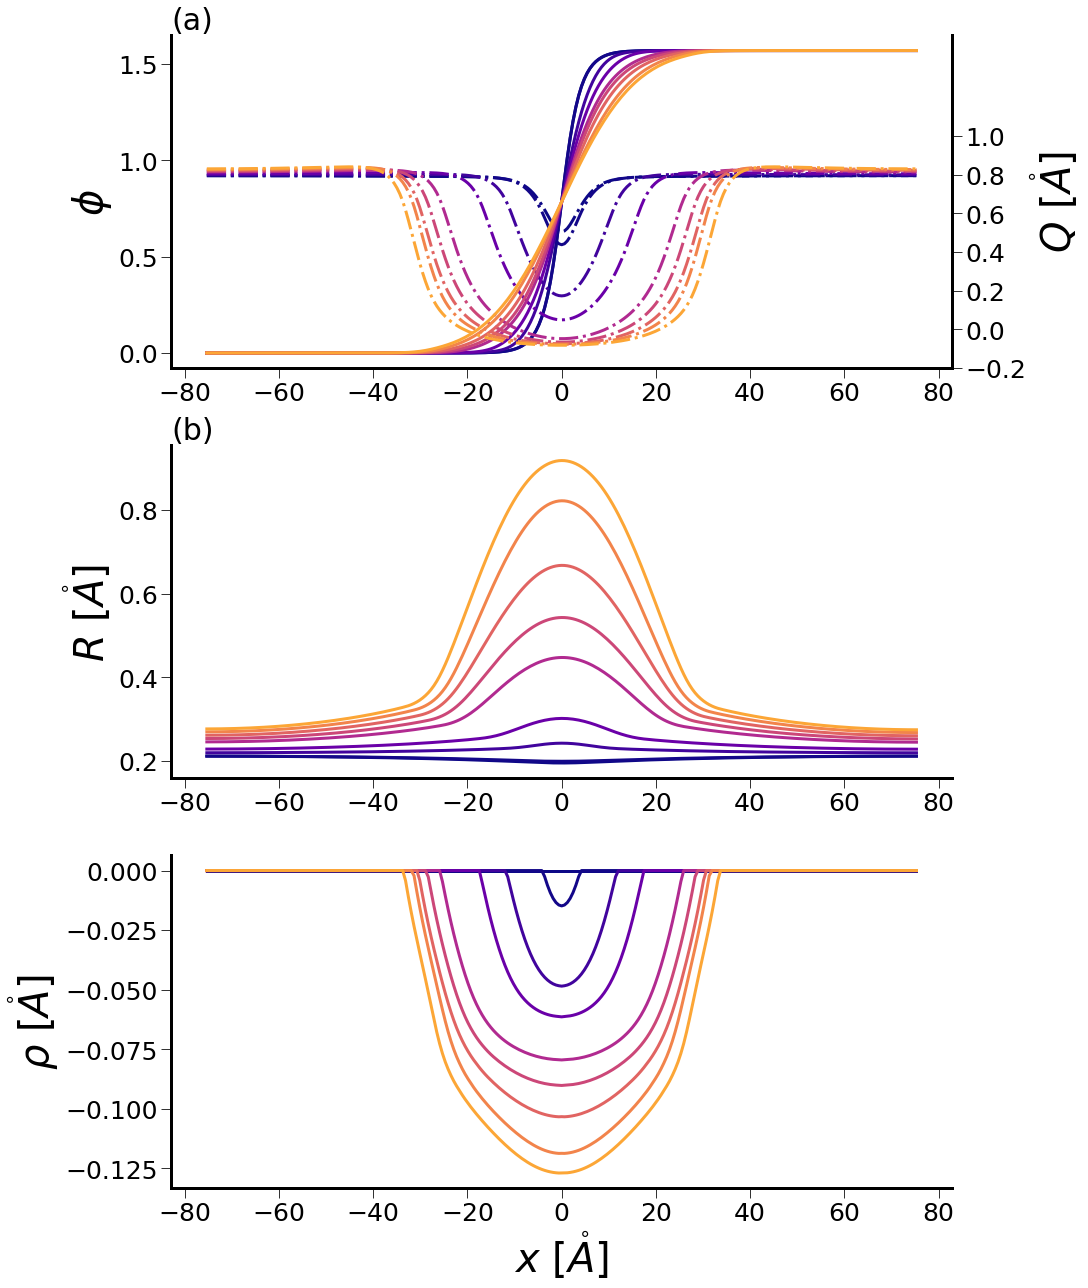

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sys


#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:60% !important; }</style>"))

filenames = ["DATA/DOMAIN_WALLS/n251_e0.numerical",
             "DATA/DOMAIN_WALLS/n251_e1E-2.numerical",
             "DATA/DOMAIN_WALLS/n251_e1E-1.numerical",
             "DATA/DOMAIN_WALLS/n251_e2E-1.numerical",
             "DATA/DOMAIN_WALLS/n251_e4E-1.numerical",
             "DATA/DOMAIN_WALLS/n251_e5E-1.numerical",
             "DATA/DOMAIN_WALLS/n251_e6E-1.numerical",
             "DATA/DOMAIN_WALLS/n251_e7E-1.numerical",
             "DATA/DOMAIN_WALLS/n251_e8E-1.numerical"
                  ]

charges = [0, 1.0E-2, 1.0E-1, 2.0E-1, 4.0E-1, 5.0E-1, 6.0E-1, 7.0E-1, 8.0E-1]


#_________________________________________________________#

#open the files
files = []

for filename in filenames:
    files.append(np.loadtxt(filename))

volume = 7.3236460686 * 7.7495899200 * 7.3236460686
shifts = []
for file in files:
    #find the necessary shifts to center plots
    shift = np.argmin(file[:,2])
    shift = 0 - file[shift, 0]
    shifts.append(shift)
    
    #converting rho to milli electrons/f.u.
    file[:,4] *= volume / (8*1000)


colormap = plt.cm.plasma
norm = plt.Normalize(vmin = charges[0], vmax=charges[len(charges)-1]*1.25)

#____________________________________NEEL PLOTS_____________________________________#
#___________________________________________________________________________________#
plt.figure(1, figsize=[15,18])

#______________________PLOT PHI AND q______________________#
ax = plt.subplot(3,1,1)
ax2 = ax.twinx()
ax.tick_params(length=10)
ax2.tick_params(length=10)

for i, file in enumerate(files):
    ax.plot(file[:,0]+shifts[i], file[:,1], linewidth=3, color=colormap(norm(charges[i])))
    ax.plot(file[:,0]+shifts[i], file[:,2], linestyle='-.', linewidth=3, color=colormap(norm(charges[i])))

ax2.set_ylim([-0.06,1.52])
ax.set_ylabel("$\phi$", fontsize=40)
ax2.set_ylabel(r"$Q \ [\mathring{A}]$", fontsize=40)

y2ticks = ax2.get_yticks()
ax2.set_yticks(y2ticks[0:7])


ax.tick_params(axis="both", length=10, labelsize=25)
ax2.tick_params(axis="both", length=10, labelsize=25)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)

ax.set_title('(a)', loc='left', fontsize=30)


#______________________PLOT p______________________#
ax = plt.subplot(3,1,2)

for i, file in enumerate(files):
    ax.plot(file[:,0]+shifts[i], file[:,3], linewidth=3, color=colormap(norm(charges[i])))
    
ax.set_ylabel(r"$R \ [\mathring{A}]$", fontsize=40)

ax.tick_params(axis="both", length=10, labelsize=25)
#yticks = ax.get_yticks()
#ax.set_yticks(yticks[3:-1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)


ax.set_title('(b)', loc='left', fontsize=30)

#______________________PLOT rho______________________#
ax = plt.subplot(3,1,3)

for i, file in enumerate(files):
    ax.plot(file[:,0]+shifts[i], file[:,4], linewidth=3, color=colormap(norm(charges[i])))

    
ax.set_xlabel("$x \ [\mathring{A}]$", fontsize=40)
ax.set_ylabel(r"$\rho \ [\mathring{A}]$", fontsize=40)    

ax.tick_params(axis="both", length=10, labelsize=25)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

plt.tight_layout()
plt.savefig('FIGS/Neel_charge.eps', bbox_inches='tight')

plt.show()